<h1> DSCI 100 Project Proposal </h1>

Introduction

For this project, we will be making use of Assocation of Tennis Profesionals (ATP) results data to predict what characteristics make the 'ultimate player'. The dataset we are using has been compiled from Jeff Slackmans Github page (https://github.com/JeffSackmann/tennis_atp). The dataset contains information regarding the players, the match, and the tournament the match was played in. We aim to determine which player characteristics best predict the outcome of a tennis match. More aptly, if a player with a given set of characterisitcs appeared, how likely is it that they would win a match against another player with a different set of characterisitcs? Examples of player characteristics include age, handedness, height and ATP rank

Match characteristics, though included in the dataset, cannot be used in this project, as they would "give away" the outcome of the match to the classifier.

We are asking a regression question, as we are attempting to discern if one or more variables can be used to predict a numerical variable of interest, in this case, the optimal age, handedness, rank, height, etc. for a player, or in other words, how often does a player of x height/age/rank win?

In [19]:
#Loading the dataset 

library(tidyverse)
library(tidyr)
options(repr.matrix.max.rows = 6)

url <- "https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn"

ATP_data <- read_csv(url)
ATP_data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,⋯,54,30,12,12,5,11,15,2320,76,667
2884,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,4,105676,NA,⋯,54,44,13,14,7,10,7,3775,15,2320
2885,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,5,106298,NA,⋯,53,29,11,11,4,11,18,2235,76,667


There are several columns which we can reasonably anticipate will not effect the results or are not in the scope of our question, and therefore should be removed:

all columns from draw_size to winner_id
winner_entry, winner_name and winner_ioc, as with the same categories for the loser
score (we are only concerned with the final outcome)
best_of
all columns relating to match information

In [20]:
#select the columns necessary from the dataset

ATP_data_trimmed <- select(ATP_data , tourney_name, surface, winner_hand, winner_ht, winner_age, loser_hand, loser_ht, loser_age, winner_rank, winner_rank_points, loser_rank, loser_rank_points)
ATP_data_trimmed

tourney_name,surface,winner_hand,winner_ht,winner_age,loser_hand,loser_ht,loser_age,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brisbane,Hard,R,178,29.00479,R,NA,22.88569,9,3590,16,1977
Brisbane,Hard,R,NA,22.88569,R,188,33.70568,16,1977,239,200
Brisbane,Hard,R,178,29.00479,R,188,31.88227,9,3590,40,1050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Davis Cup WG F: BEL vs FRA,Hard,R,188,32.59411,R,178,33.68925,15,2320,76,667
Davis Cup WG F: BEL vs FRA,Hard,R,163,26.95414,R,188,32.59411,7,3775,15,2320
Davis Cup WG F: BEL vs FRA,Hard,R,185,23.73990,R,178,33.68925,18,2235,76,667


After removing those extra columns, this dataset is relatively clean, in that it meets these criteria:

Each column is a single variable
Each value is a single cell
Each row is a unqiue observation
However, there are some observations that contain 'NA' values, which make the data untidy, therefore, all rows with an NA value should be removed

In [21]:
#drop_na function is an easy way to drop rows with NA values, but it requires the tidyr library

library(tidyr)
ATP_data_tidy <- drop_na(ATP_data_trimmed)
ATP_data_tidy

tourney_name,surface,winner_hand,winner_ht,winner_age,loser_hand,loser_ht,loser_age,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brisbane,Hard,R,178,29.00479,R,188,31.88227,9,3590,40,1050
Brisbane,Hard,R,178,29.00479,R,188,27.62765,9,3590,19,1835
Brisbane,Hard,R,188,31.88227,R,193,23.67967,40,1050,35,1125
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Davis Cup WG F: BEL vs FRA,Hard,R,188,32.59411,R,178,33.68925,15,2320,76,667
Davis Cup WG F: BEL vs FRA,Hard,R,163,26.95414,R,188,32.59411,7,3775,15,2320
Davis Cup WG F: BEL vs FRA,Hard,R,185,23.73990,R,178,33.68925,18,2235,76,667


Now the data is tidy and ready to work with!

Next, we will create some preliminary visualizations. First off, it will be helpful to see how certain player characteristics, like height and player rank, are distributed amongst winning and losing players.

We will create our training and testing sets below to get started on making a table and plot of the given dataset to get a better sense of what we are working with.

In [22]:
ATP_split<- initial_split(ATP_data_tidy, prop = 0.75, strata = winner_rank)
ATP_training <- training(ATP_split)
ATP_testing <- testing(ATP_split)

We now have a training and testing set of data to work with and create basic and preliminary visualizations for to
test and examine before we go any further.

In [ ]:
Dataset table:
{table visualization and writing here} 
(instructions: Using only training data, summarize the data in at least one table 
(this is exploratory data analysis). An example of a useful table could be one that reports the number of 
observations in each class)

Plotting our data:

since our data has a loser and winner set of data, we can create a plot showing different stats of both data with side by side graph comparisons. 

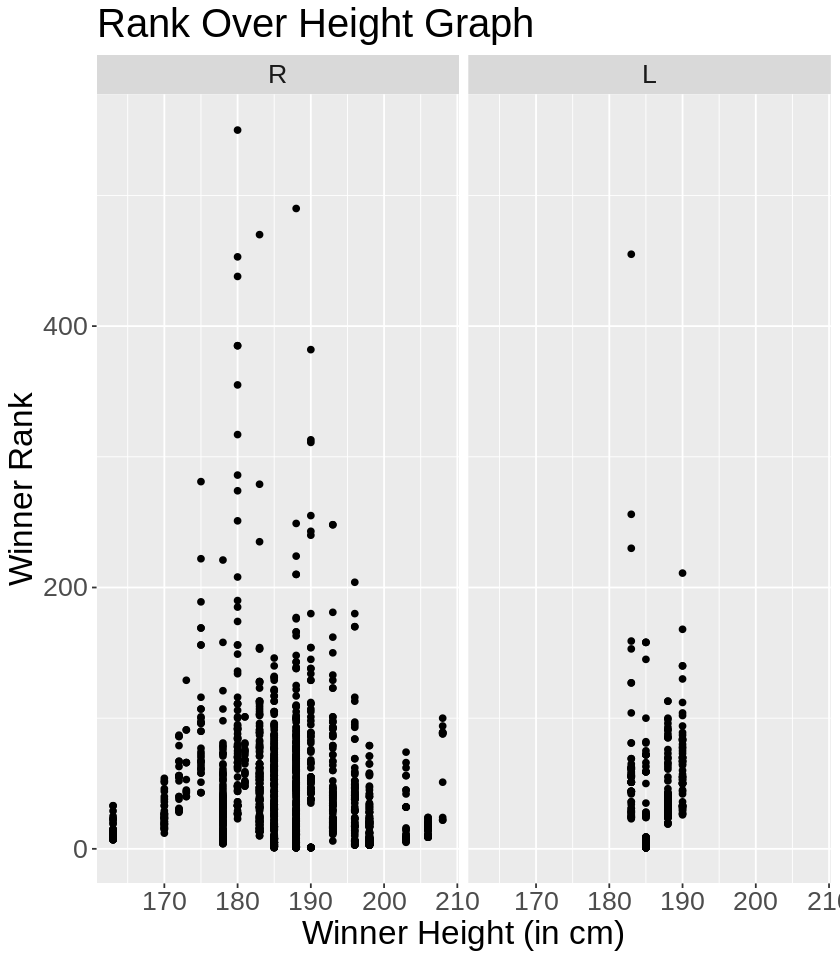

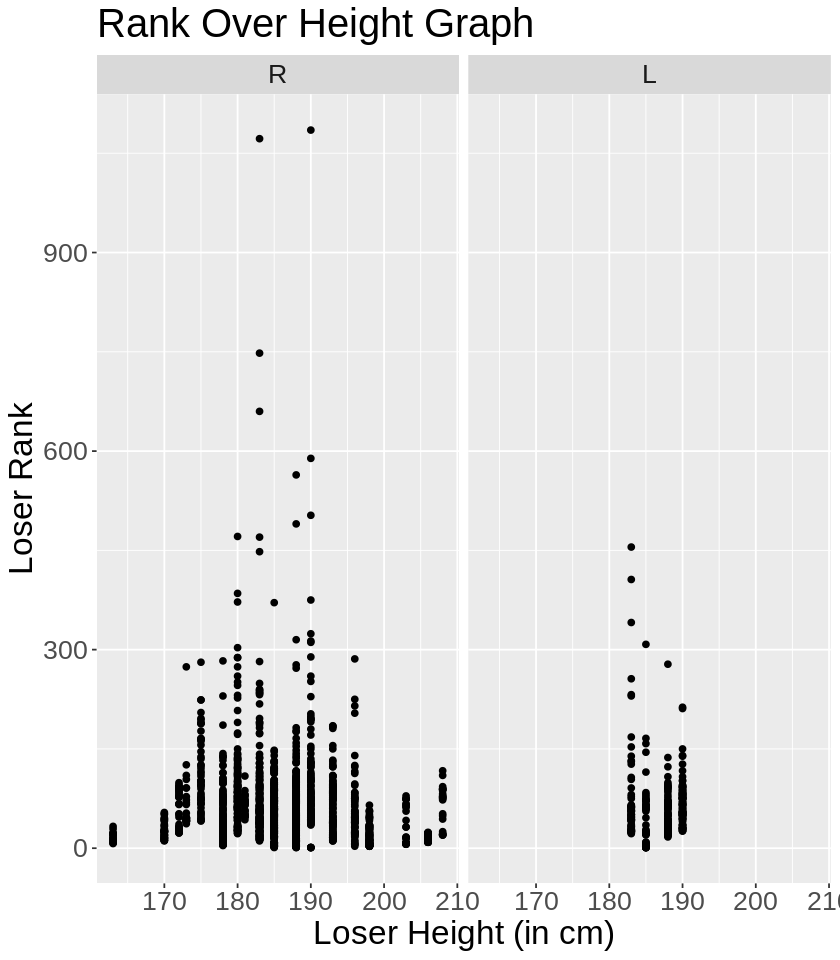

In [34]:
options(repr.plot.height = 8, repr.plot.width = 7)

ATP_plot <- ggplot(ATP_training, aes(x = winner_ht, y = winner_rank)) +
geom_point() +
facet_wrap(~ factor(winner_hand, levels = c("R","L"))) +
xlab("Winner Height (in cm)") +
ylab("Winner Rank") +
ggtitle("Rank Over Height Graph") +
theme(text = element_text(size = 20))
ATP_plot


ATP_plot2 <- ggplot(ATP_training, aes(x = loser_ht, y = loser_rank)) +
geom_point() +
facet_wrap(~ factor(loser_hand, levels = c("R","L"))) +
xlab("Loser Height (in cm)") +
ylab("Loser Rank") +
ggtitle("Rank Over Height Graph") +
theme(text = element_text(size = 20))
ATP_plot2

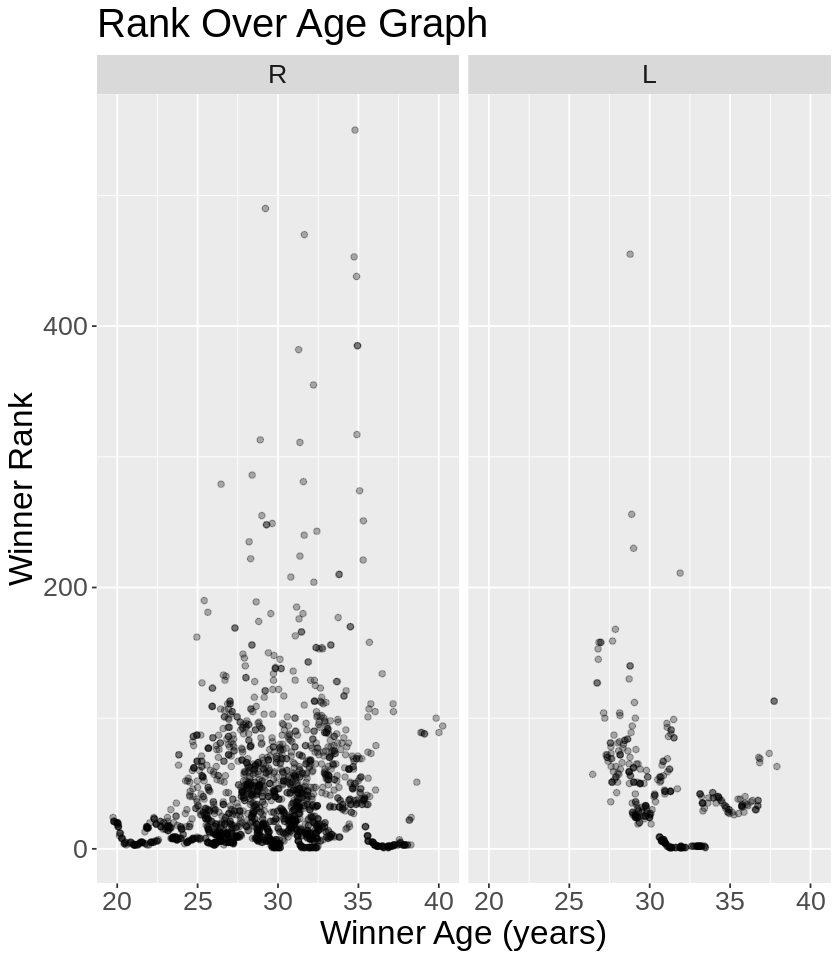

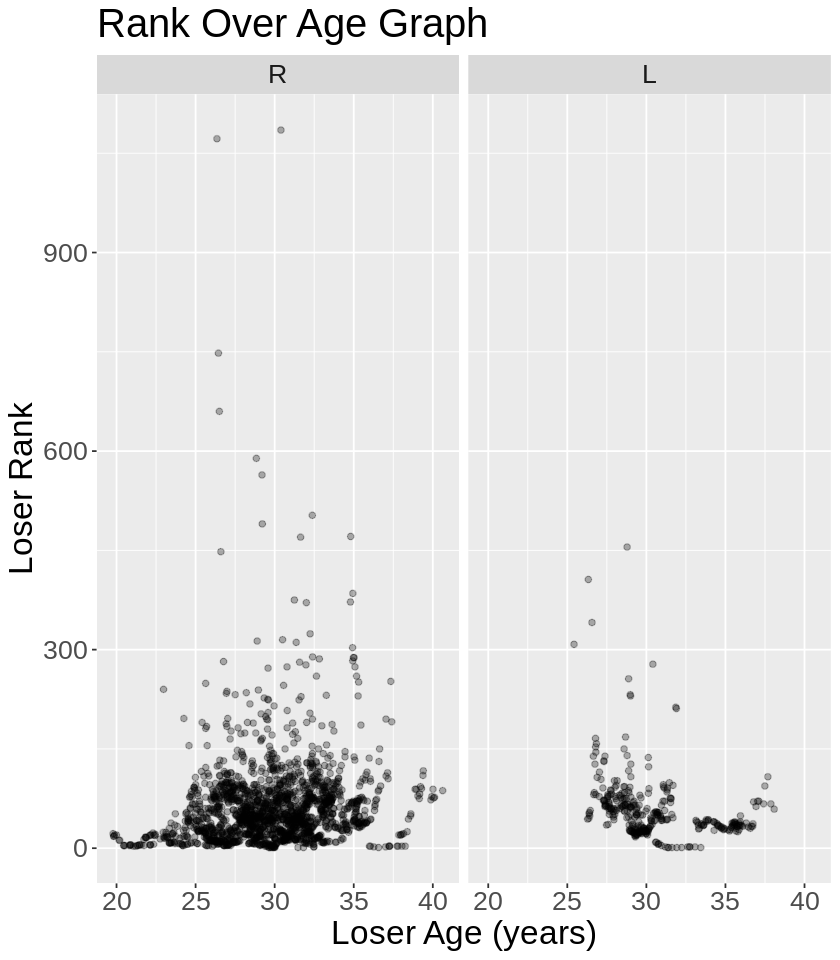

In [35]:
options(repr.plot.height = 8, repr.plot.width = 7)

ATP_plot3 <- ggplot(ATP_training, aes(x = winner_age, y = winner_rank)) +
geom_point(alpha = 0.3) +
facet_wrap(~ factor(winner_hand, levels = c("R","L"))) +
xlab("Winner Age (years)") +
ylab("Winner Rank") +
ggtitle("Rank Over Age Graph") +
theme(text = element_text(size = 20))
ATP_plot3


ATP_plot4 <- ggplot(ATP_training, aes(x = loser_age, y = loser_rank)) +
geom_point(alpha = 0.3) +
facet_wrap(~ factor(loser_hand, levels = c("R","L"))) +
xlab("Loser Age (years)") +
ylab("Loser Rank") +
ggtitle("Rank Over Age Graph") +
theme(text = element_text(size = 20))
ATP_plot4